In [1]:
from CNNTextClassifier import *
import datetime
from utils import *
from evaluateModel import *

In [2]:
train_set, val_set, test_set, sve_kategorije = ucitajPodatke('../')

In [3]:
emb_size=300
out_size=len(sve_kategorije)
batch_size=25
output_dir="results/{:%Y%m%d_%H%M%S}/".format(datetime.now())
epochs=500
lr=0.005
filter_sizes=[1,2,3,5]
num_filters = 36
dropout_rate=0.1
train = False #ako želimo trenirati postavimo na True, a ako samo želimo evaluirati postojeći model onda na False
if train:
    ft = ucitajFasttext('../../')
    weights_matrix = getWeightsMatrix(char_list,ft)
else:
    weights_matrix = torch.from_numpy(np.zeros((len(char_list)+1, emb_size))).float() #dummy matrix da se ne mora ucitavati fasttext

In [4]:
# definiranje modela
model = CNN_Text(out_size, vocab_len, emb_size, weights_matrix, filter_sizes, num_filters, dropout_rate)

In [ ]:
## ako zelimo trenirati
from trainModel import *
model_weights_path = train(model, train_set, val_set, batch_size, output_dir, epochs, lr)
print('naučene težine modela u spremljene u:', model_weights_path)

Final evaluation on test set
test loss 0.248, test accuracy 0.937, test rmse 0.774, test microF1 0.771, test macroF1 0.937, test weightedF1 0.932
tensor([[0.9597, 0.0134, 0.0027, 0.0027, 0.0000, 0.0081, 0.0134],
        [0.0179, 0.9286, 0.0000, 0.0536, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.0000, 0.7500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3000, 0.0000, 0.7000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000, 0.2000, 0.0000],
        [0.0000, 0.0244, 0.0000, 0.0000, 0.0244, 0.9024, 0.0488],
        [0.1250, 0.0000, 0.0000, 0.0000, 0.0000, 0.1250, 0.7500]])


/home/rcoric/klasifikacija/CNNClassification/evaluateModel.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + nazivi, rotation=90)
/home/rcoric/klasifikacija/CNNClassification/evaluateModel.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + nazivi)


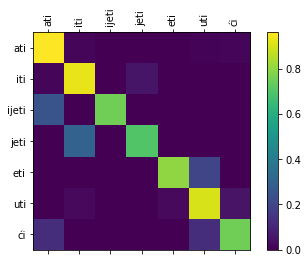

In [5]:
# evaluacija prethodno spremljenog modela
model_weights_path='../results/20211116_130204/model.weights'
evaluateOnTestSet(model, model_weights_path, test_set,sve_kategorije)

infinitiv završava na: ati


/home/rcoric/klasifikacija/CNNClassification/evaluateModel.py:97: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + nazivi)


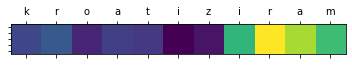

infinitiv završava na: ati


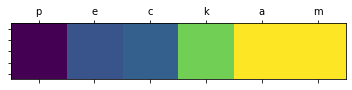

infinitiv završava na: ati


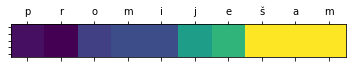

infinitiv završava na: ati


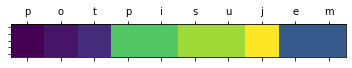

infinitiv završava na: ati


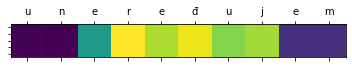

infinitiv završava na: ati


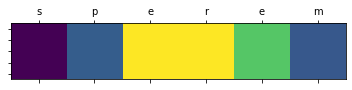

In [6]:
# heatmaps i predikcije za željene glagole
glagoli = ['kroatiziram','peckam','promiješam','potpisujem','uneređujem','sperem']
for gl in glagoli:
    #napravi heatmap
    heatmap(gl,model)